# Predicting Housing Prices
## CS 4210 - Professor Marin
#### Neil Patrick Reyes
#### Drake Fafard
#### Jason Ryan Jones
#### Andrew Sanford
#### Vu Nguyen


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.inspection import permutation_importance
import math


## Step 1: Cleaning

In [2]:
# URL of the Training CSV file
train_url = "https://raw.githubusercontent.com/neilpreyes/ML_Data/main/train.csv"

# Read the CSV file into a DataFrame
df_train = pd.read_csv(train_url)
sum(df_train.duplicated())

0

In [3]:
# URL of the Test CSV file
test_url = "https://raw.githubusercontent.com/neilpreyes/ML_Data/main/test.csv"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(test_url)
sum(df_test.duplicated())

0

In [4]:
# Display the DataFrame
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

##Step 2: Visualize the Data

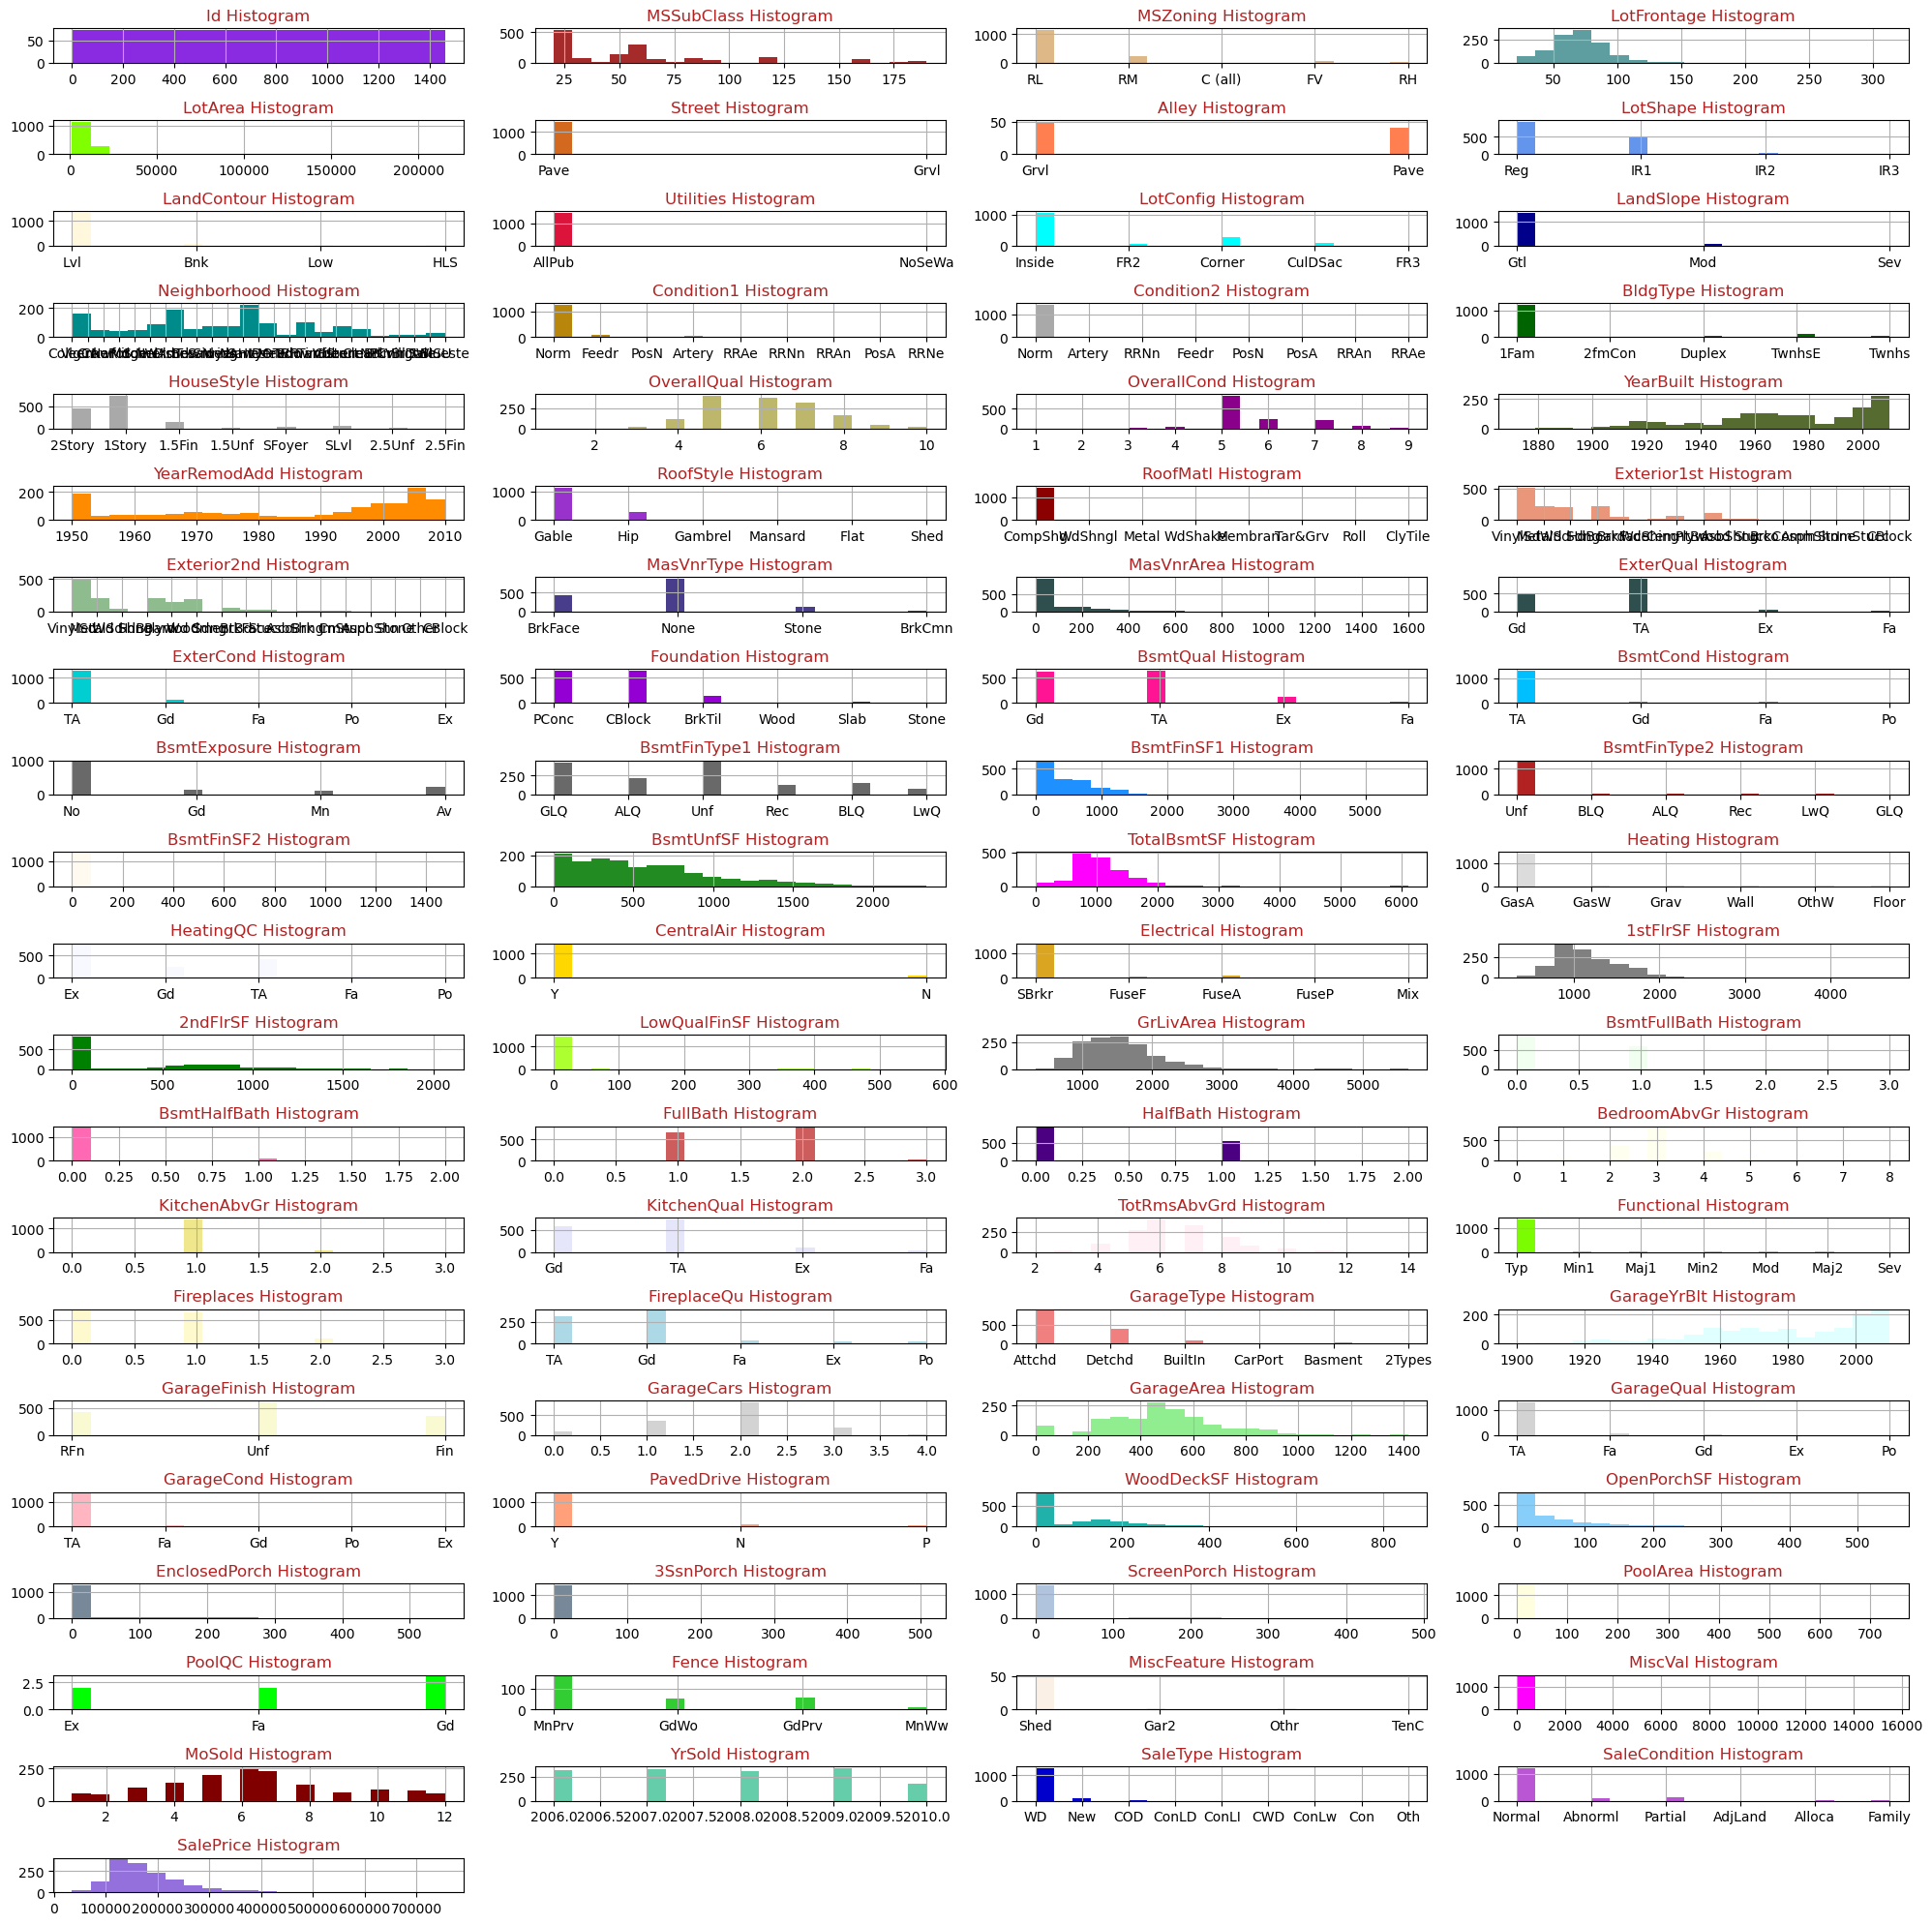

In [6]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df_train.columns):
  f = fig.add_subplot(21, 4, i+1)
  df_train[feature].hist(bins = 20, ax = f, facecolor = colors[i])
  f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

C:\Users\Jason\AppData\Local\Temp\ipykernel_3328\3534795694.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)


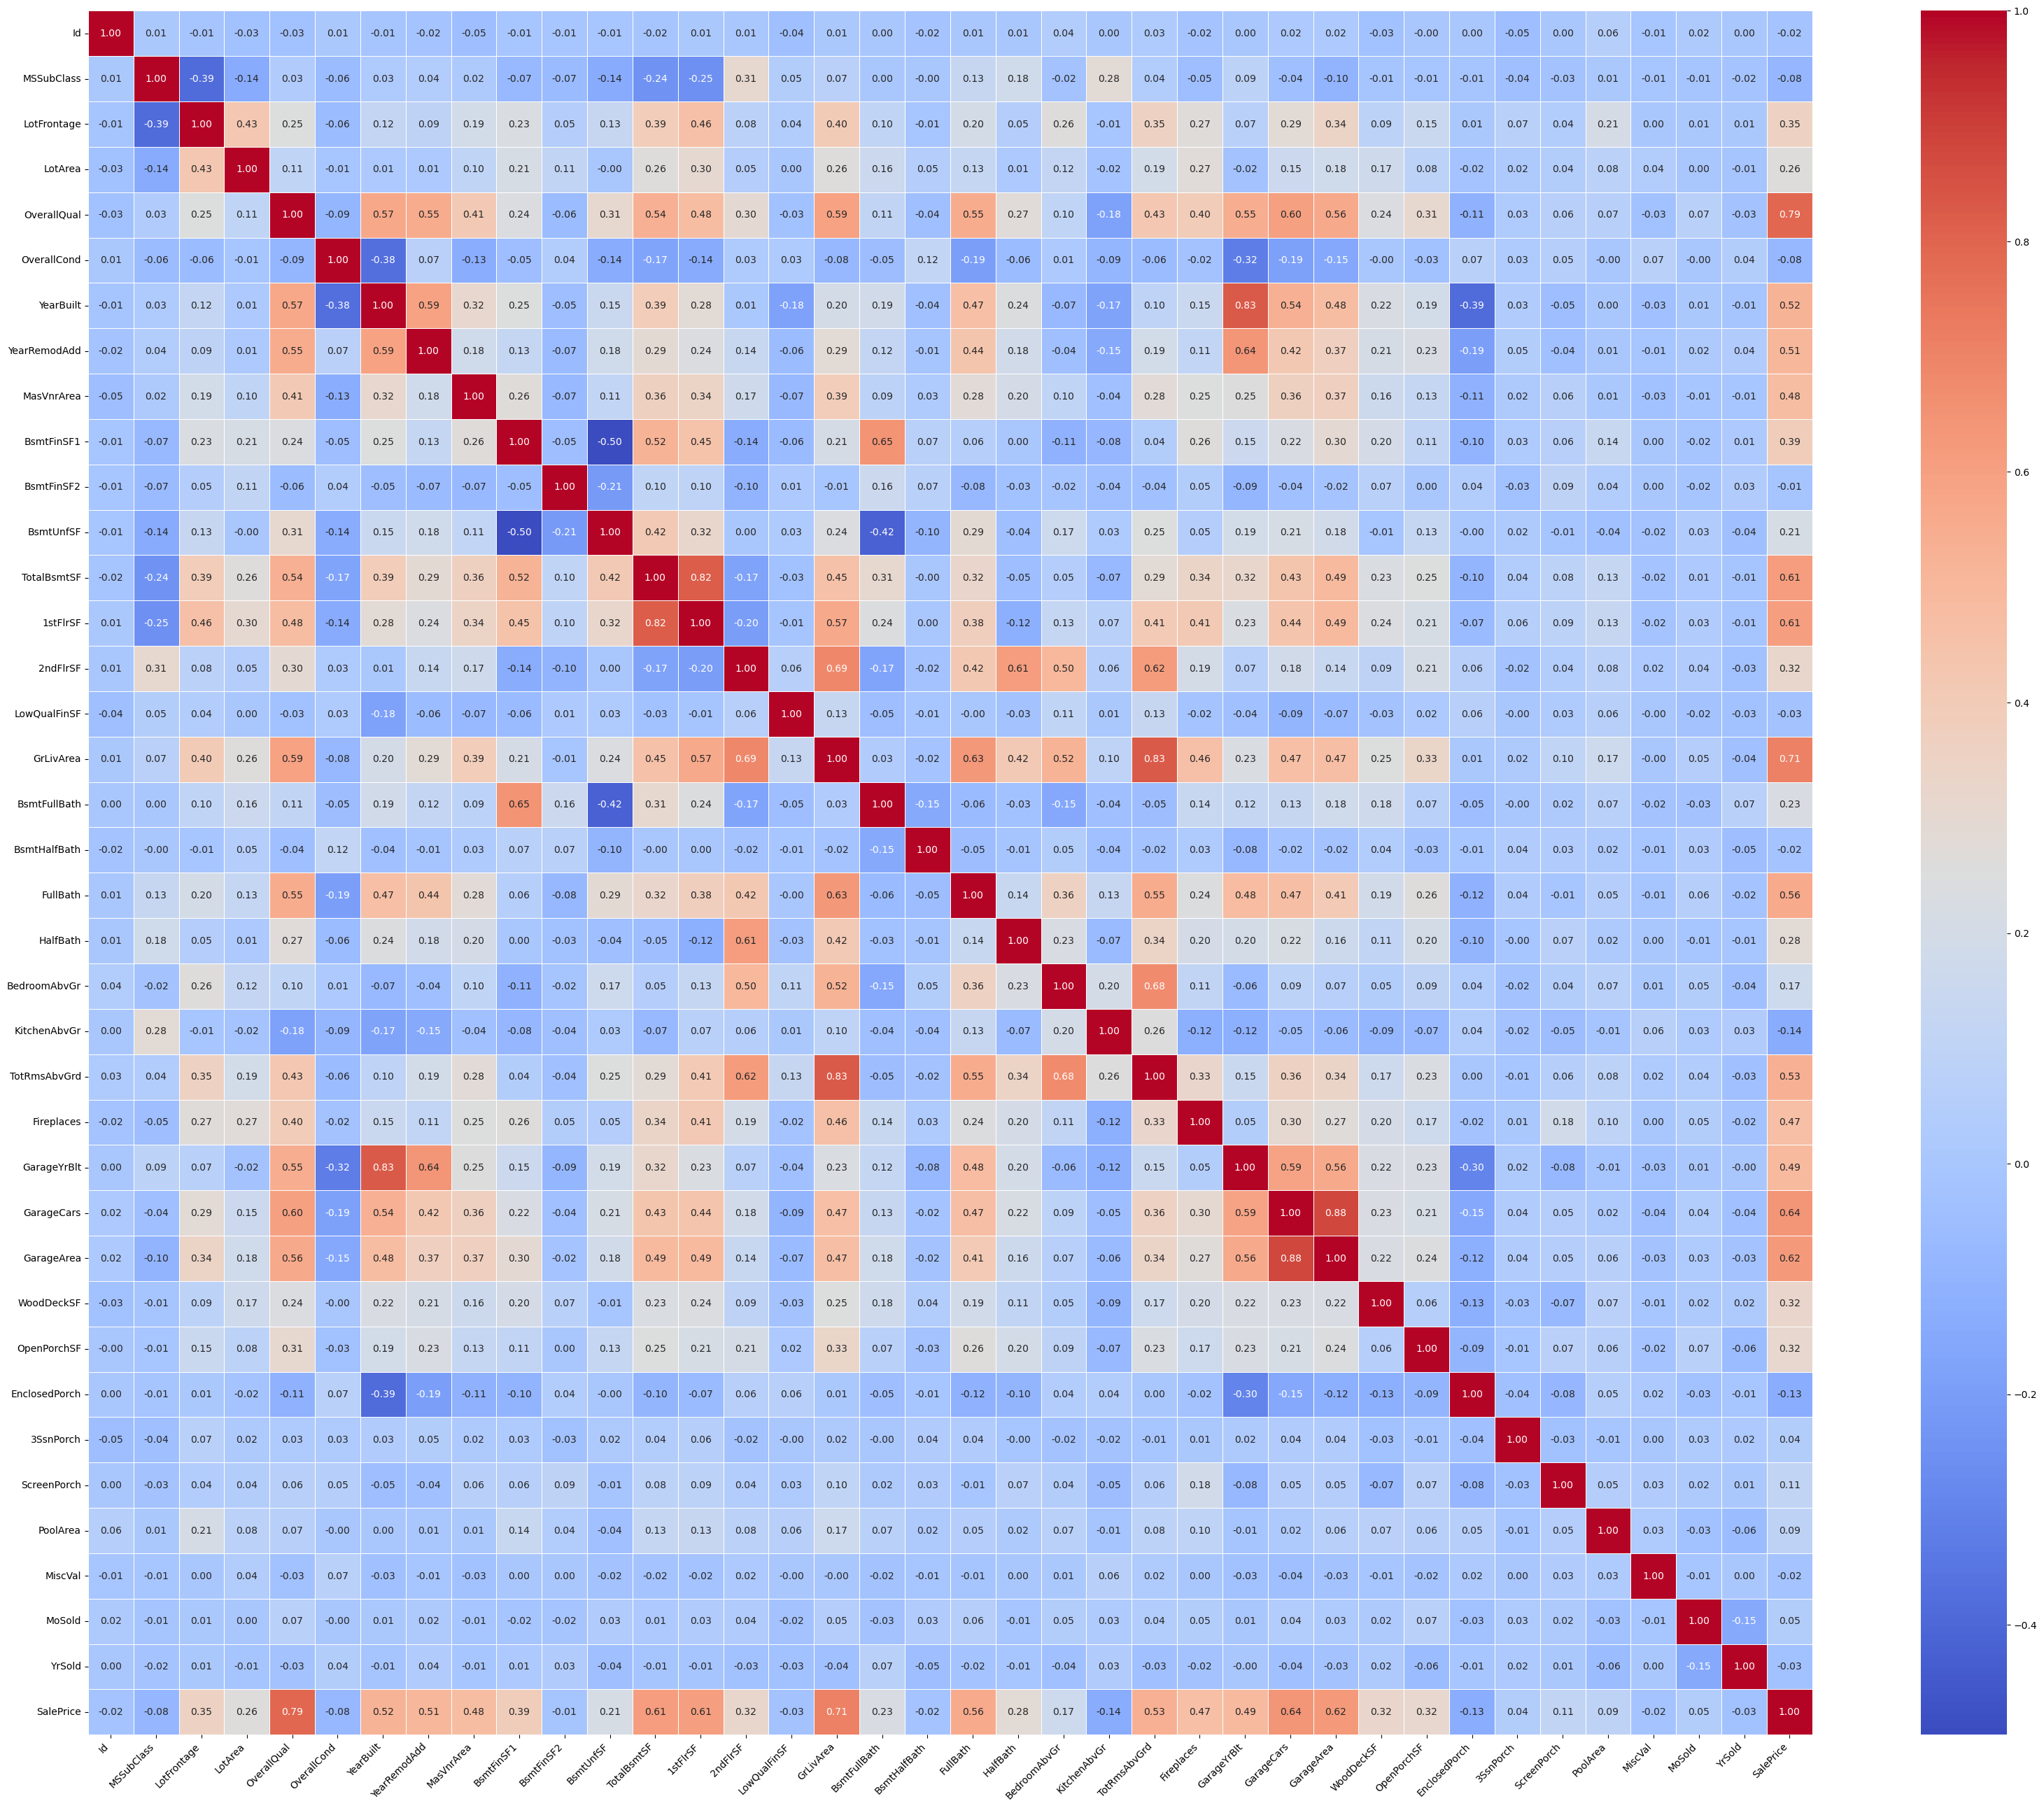

In [7]:
plt.figure(figsize = (40, 32))

# Create a heatmap with rotated labels
heatmap = sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Rotate the labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

## Step 3: Drop unnecessary features

In [8]:
#In a heat map: 1 - positive correlation, -1 - negative correlation, 0 - no correlation
df_train = df_train.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
#Remove same columns as training set
df_test = df_test.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

## Step 4: Map The Data

In [9]:
#MAP DATA TO NUMBER VALUES
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

"""
for column in df_train.columns:
    if df_train[column].dtype == 'O':  # Check if the data type is object (string)
        df_train[column] = label_encoder.fit_transform(df_train[column])
"""

# Define custom mapping for each categorical column
mapping = {
    'MSZoning': {'A': 0, 'C': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7},
    'Street': {'Grvl': 1, 'Pave': 2},
    'Alley': {'Grvl': 1, 'Pave': 2, 'NA': 0},
    'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
    'LandContour': {'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0},
    'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0},
    'LotConfig': {'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0},
    'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev': 0},
    'Neighborhood': {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'Names': 12, 'NoRidge': 13, 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24},
    'Condition1': {'Artery': 8, 'Feedr': 7, 'Norm': 6, 'RRNn': 5, 'RRAn': 4, 'PosN': 3, 'PosA': 2, 'RRNe': 1, 'RRAe': 0},
    'Condition2': {'Artery': 8, 'Feedr': 7, 'Norm': 6, 'RRNn': 5, 'RRAn': 4, 'PosN': 3, 'PosA': 2, 'RRNe': 1, 'RRAe': 0},
    'BldgType': {'1Fam': 4, '2FmCon': 3, 'Duplx': 2, 'TwnhsE': 1, 'TwnhsI': 0},
    'HouseStyle': {'1Story': 0, '1.5Fin': 2, '1.5Unf': 1, '2Story': 3, '2.5Fin': 5, '2.5Unf': 6, 'SFoyer': -1, 'SLvl': -1},
    'OverallQual': {10: 10, 9: 9, 8: 8, 7: 7, 6: 6, 5: 5, 4: 4, 3: 3, 2: 2, 1: 1},
    'RoofStyle': {'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5},

    'RoofMatl': {'ClyTile': 7, 'CompShg': 6, 'Membran': 5, 'Metal': 4, 'Roll': 3, 'Tar&Grv': 2,
             'WdShake': 1, 'WdShngl': 0},

    'Exterior1st': {'AsbShng': 16, 'AsphShn': 15, 'BrkComm': 14, 'BrkFace': 13, 'CBlock': 12, 'CemntBd': 11,
                'HdBoard': 10, 'ImStucc': 9, 'MetalSd': 8, 'Other': 7, 'Plywood': 6, 'PreCast': 5,
                'Stone': 4, 'Stucco': 3, 'VinylSd': 2, 'Wd Sdng': 1, 'WdShing': 0},

    'Exterior2nd': {'AsbShng': 16, 'AsphShn': 15, 'BrkComm': 14, 'BrkFace': 13, 'CBlock': 12, 'CemntBd': 11,
                'HdBoard': 10, 'ImStucc': 9, 'MetalSd': 8, 'Other': 7, 'Plywood': 6, 'PreCast': 5,
                'Stone': 4, 'Stucco': 3, 'VinylSd': 2, 'Wd Sdng': 1, 'WdShing': 0},

    'MasVnrType': {'BrkCmn': 4, 'BrkFace': 3, 'CBlock': 2, 'None': 1, 'Stone': 0},

    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},

    'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},

    'Foundation': {'BrkTil': 4, 'CBlock': 3, 'PConc': 2, 'Slab': 1, 'Stone': 0, 'Wood': -1},

    'BsmtQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},

    'BsmtCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},

    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},

    'BsmtFinType1': {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': -1},

    'BsmtFinType2': {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': 0, 'NA': -1},

    'Heating': {'Floor': 0, 'GasA': 1, 'GasW': 2, 'Grav': 3, 'OthW': 4, 'Wall': 5},

    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},

    'CentralAir': {'N': 0, 'Y': 1},

    'Electrical': {'SBrkr': 3, 'FuseA': 2, 'FuseF': 1, 'FuseP': 0, 'Mix': -1},

    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},

    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0},

    'FireplaceQu': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1},

    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},

    'GarageFinish': {'Fin': 2, 'RFn': 1, 'Unf': 0, 'NA': -1},

    'GarageQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1},

    'GarageCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'NA': -1},

    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0},

    'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0},

    'Fence': {'GdPrv': 3, 'MnPrv': 2, 'GdWo': 1, 'MnWw': 0, 'NA': -1},

    'MiscFeature': {'Elev': 5, 'Gar2': 4, 'Othr': 3, 'Shed': 2, 'TenC': 1, 'NA': 0},

    'SaleType': {'WD': 9, 'CWD': 8, 'VWD': 7, 'New': 6, 'COD': 5, 'Con': 4, 'ConLw': 3, 'ConLI': 2, 'ConLD': 1, 'Oth': 0},

    'SaleCondition': {'Normal': 5, 'Abnorml': 4, 'AdjLand': 3, 'Alloca': 2, 'Family': 1, 'Partial': 0}
}

# Apply mapping to the DataFrame
for col, col_mapping in mapping.items():
    df_train[col] = df_train[col].map(col_mapping)

for col, col_mapping in mapping.items():
    df_test[col] = df_test[col].map(col_mapping)

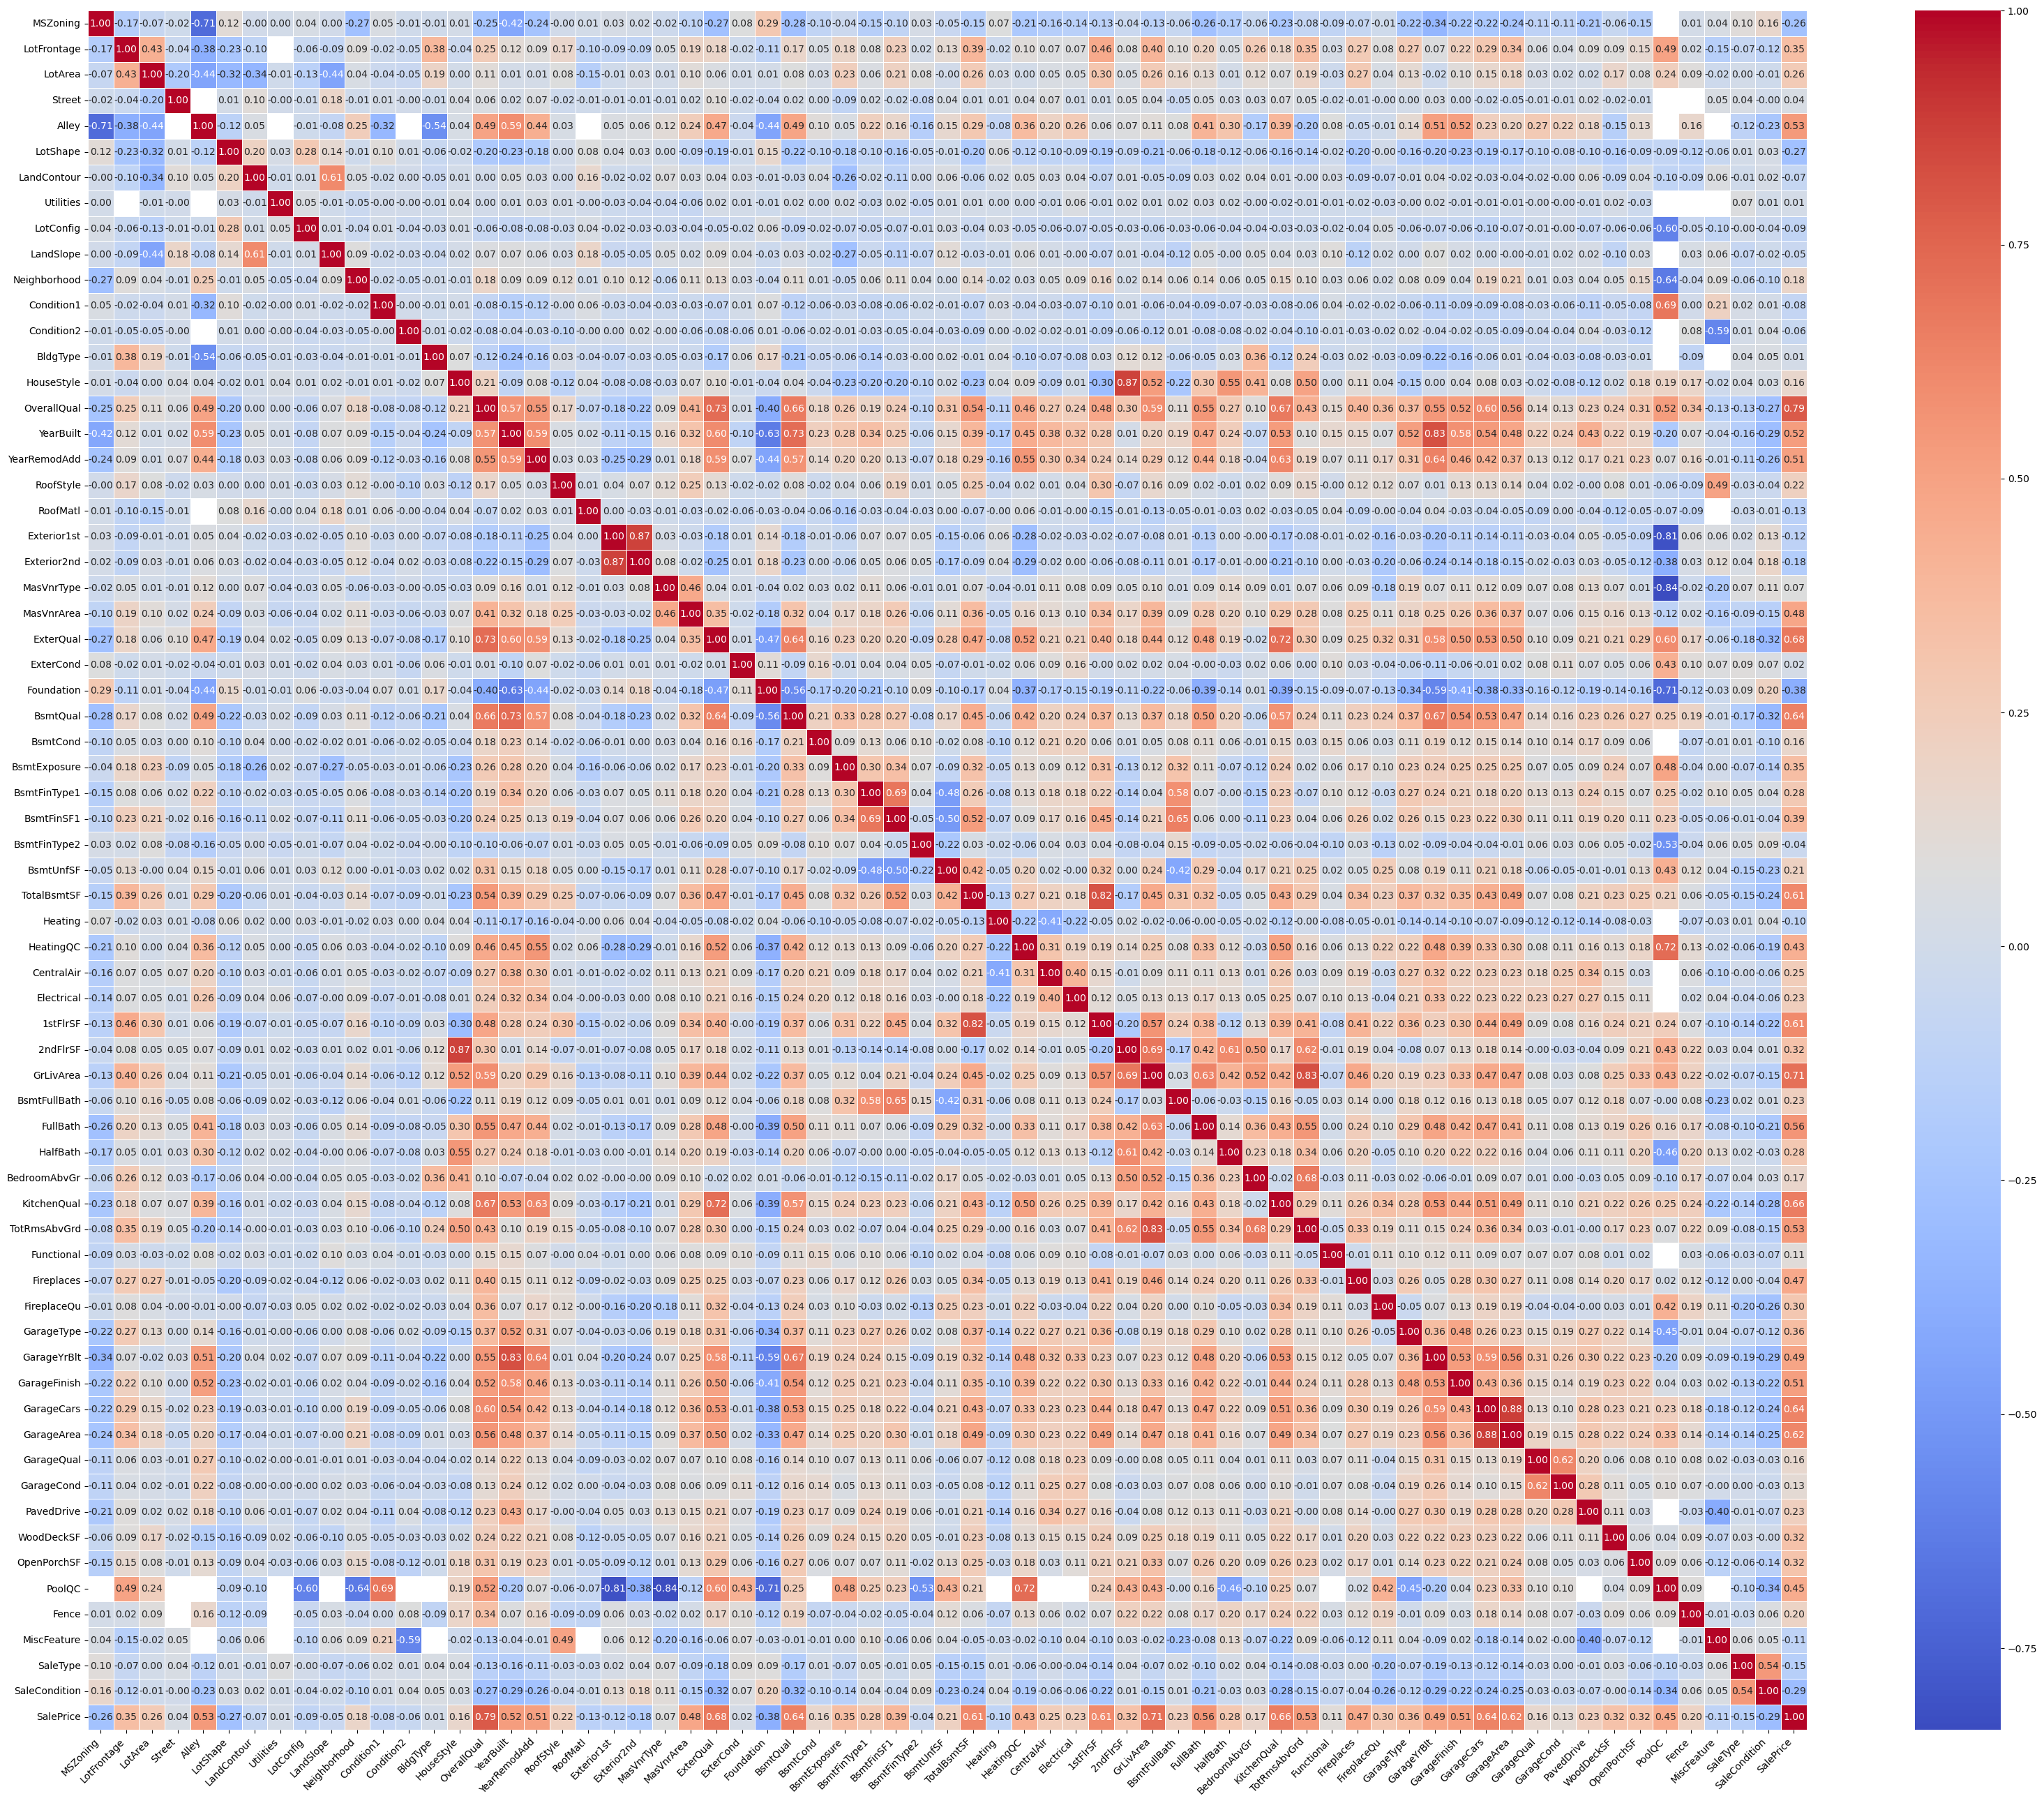

In [10]:
plt.figure(figsize = (40, 32))

# Create a heatmap with rotated labels
heatmap = sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Rotate the labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

In [11]:
#In a heat map: 1 - positive correlation, -1 - negative correlation, 0 - no correlation
df_train = df_train.drop(columns=['MSZoning', 'LotShape', 'LandSlope', 'LotConfig', 'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType2', 'Heating', 'MiscFeature', 'SaleCondition',
                                   'SaleType'])
#Remove same columns as training set
df_test = df_test.drop(columns=['MSZoning', 'LotShape', 'LandSlope', 'LotConfig', 'Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType2', 'Heating', 'MiscFeature', 'SaleCondition',
                                   'SaleType'])

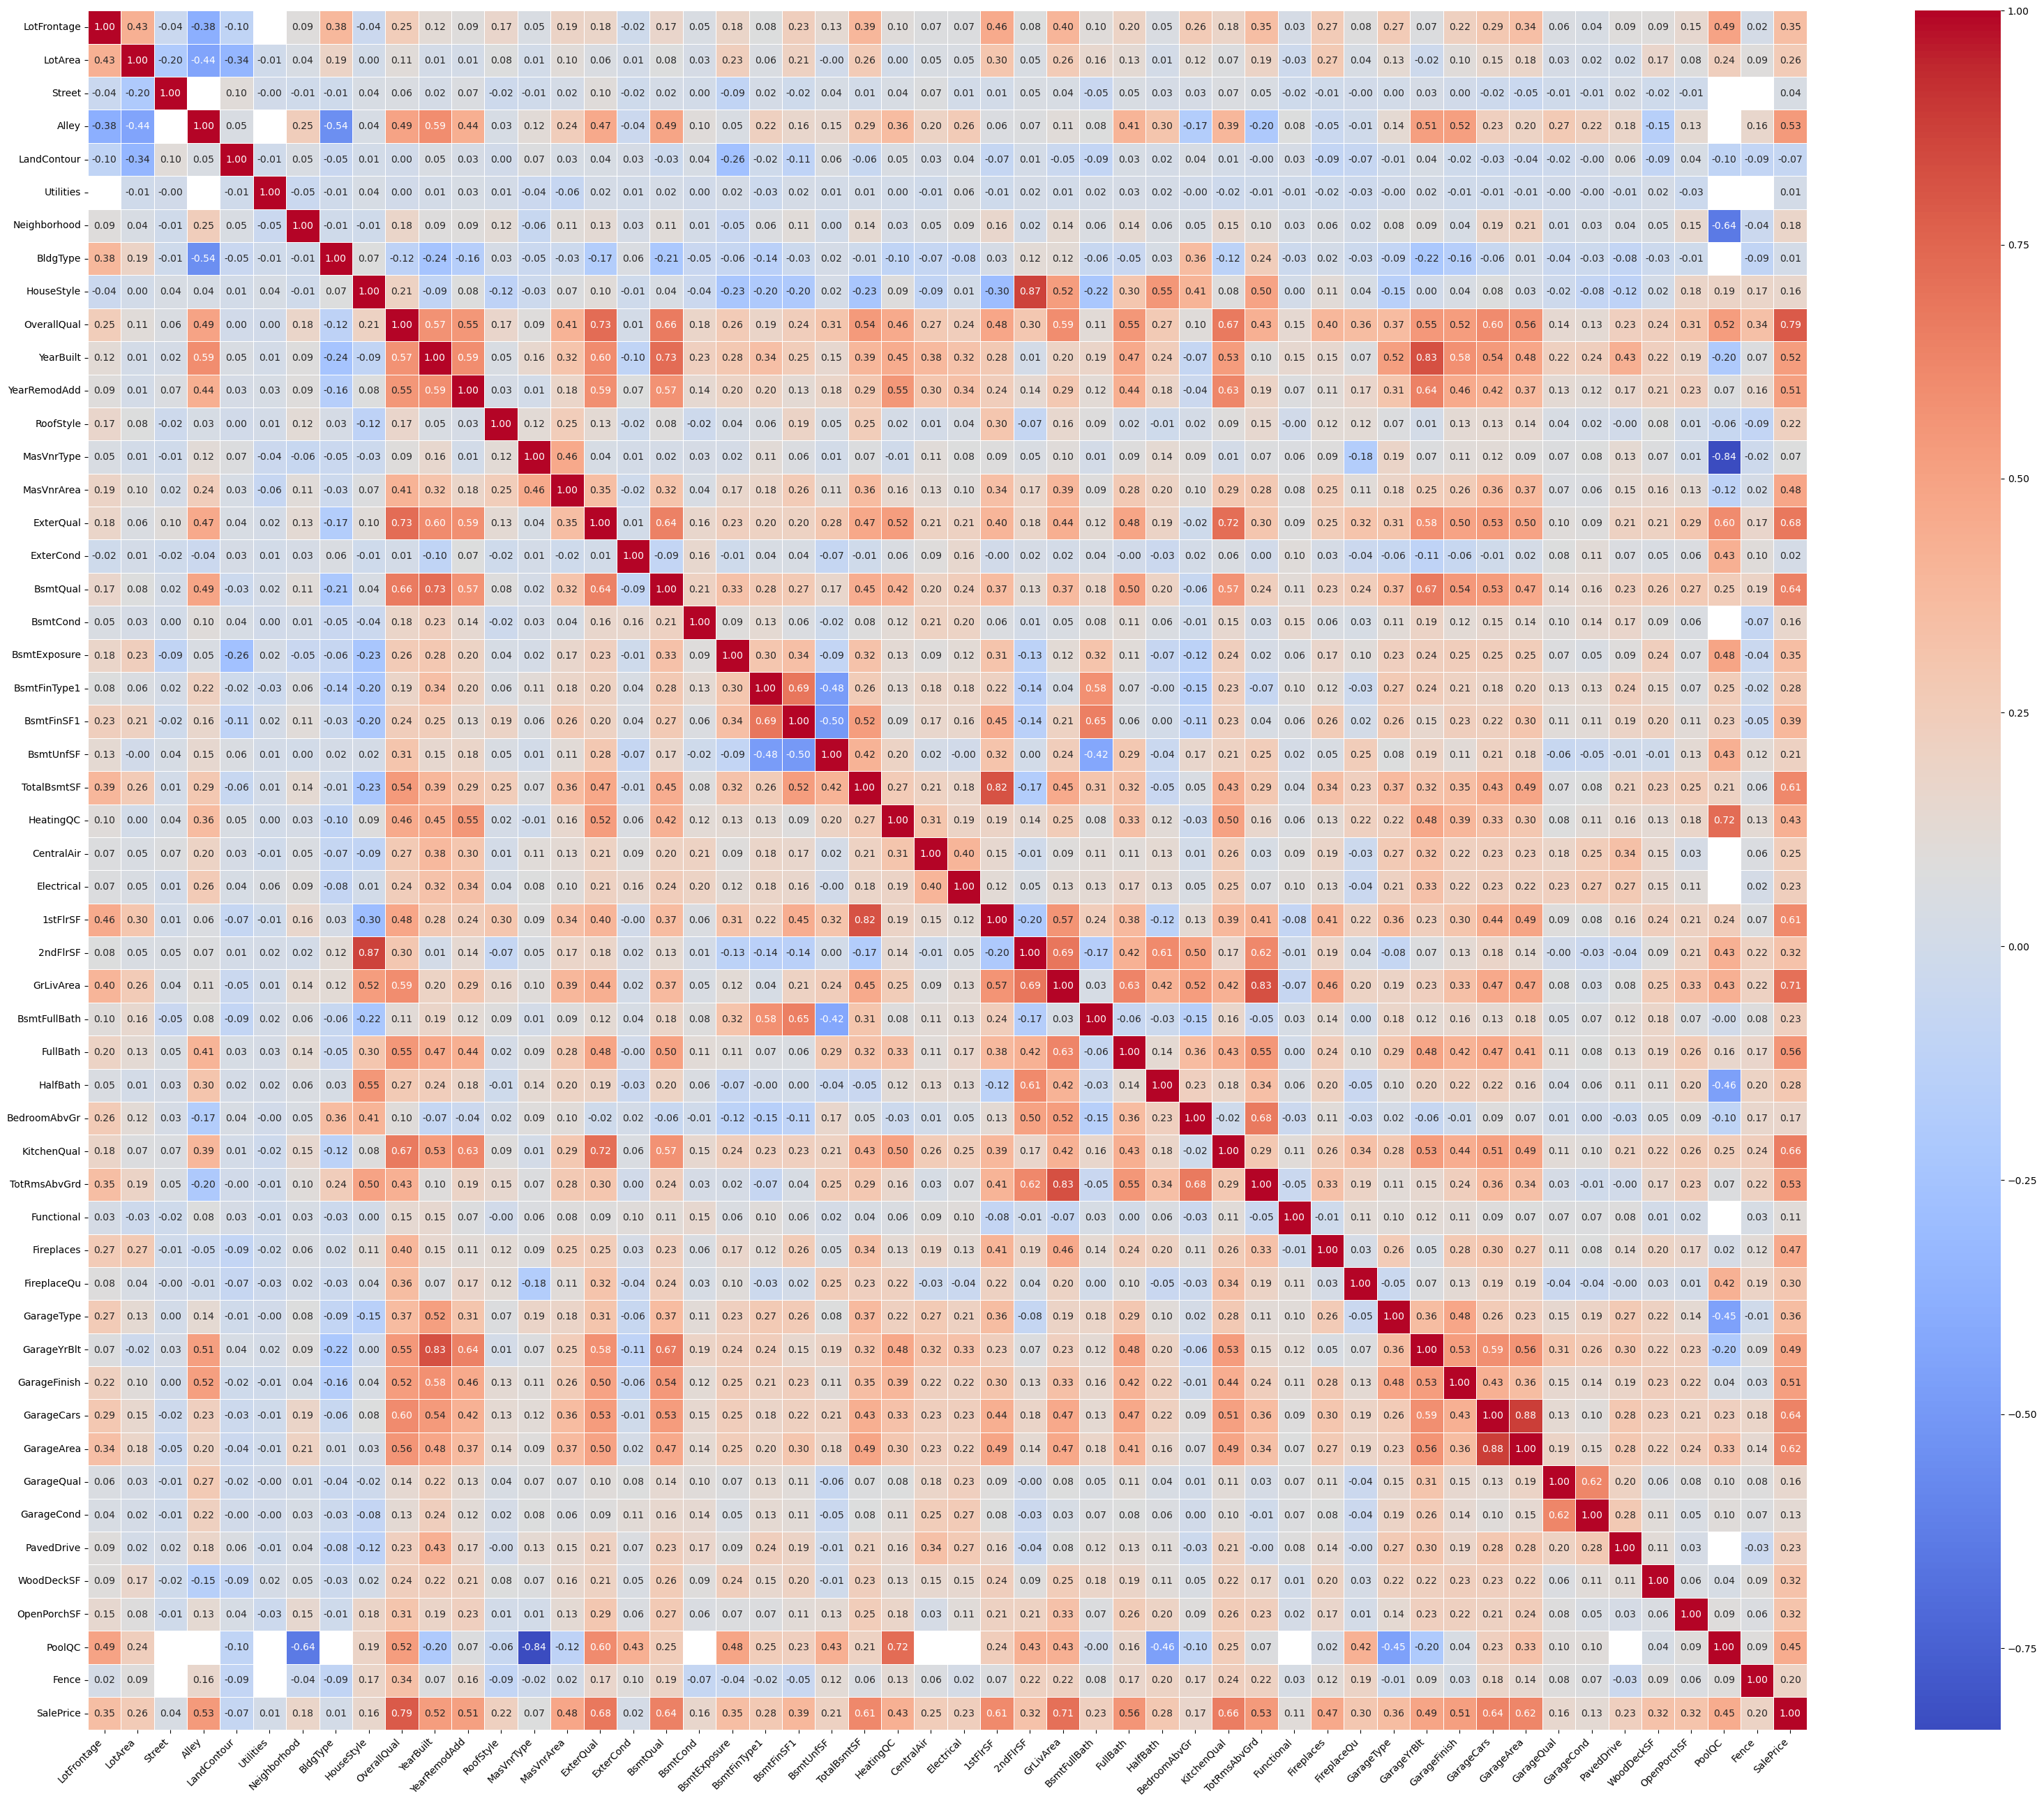

In [12]:
plt.figure(figsize = (40, 32))

# Create a heatmap with rotated labels
heatmap = sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Rotate the labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

In [13]:
#Create X and Y Training
X_train = df_train.iloc[:, df_train.columns != 'SalePrice']
Y_train = df_train.iloc[:, df_train.columns == 'SalePrice']

In [14]:
#Create X Test (No Y because SalePrice is not a column)
X_test = df_test.copy()

In [15]:
X_train.head()

LotFrontage  LotArea  Street  Alley  LandContour  Utilities  Neighborhood  \
0         65.0     8450       2    NaN            3          3           5.0   
1         80.0     9600       2    NaN            3          3          24.0   
2         68.0    11250       2    NaN            3          3           5.0   
3         60.0     9550       2    NaN            3          3           6.0   
4         84.0    14260       2    NaN            3          3          13.0   

   BldgType  HouseStyle  OverallQual  ...  GarageFinish  GarageCars  \
0       4.0           3            7  ...           1.0           2   
1       4.0           0            6  ...           1.0           2   
2       4.0           3            7  ...           1.0           2   
3       4.0           3            7  ...           0.0           3   
4       4.0           3            8  ...           1.0           3   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         2.0         2.0           2           0           61   
1         460         2.0         2.0           2         298            0   
2         608         2.0         2.0           2           0           42   
3         642         2.0         2.0           2           0           35   
4         836         2.0         2.0           2         192           84   

   PoolQC  Fence  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN  

[5 rows x 51 columns]

In [16]:
X_test.head()

LotFrontage  LotArea  Street  Alley  LandContour  Utilities  Neighborhood  \
0         80.0    11622       2    NaN            3        3.0           NaN   
1         81.0    14267       2    NaN            3        3.0           NaN   
2         74.0    13830       2    NaN            3        3.0           8.0   
3         78.0     9978       2    NaN            3        3.0           8.0   
4         43.0     5005       2    NaN            1        3.0          22.0   

   BldgType  HouseStyle  OverallQual  ...  GarageFinish  GarageCars  \
0       4.0           0            5  ...           0.0         1.0   
1       4.0           0            6  ...           0.0         1.0   
2       4.0           3            5  ...           2.0         2.0   
3       4.0           3            6  ...           2.0         2.0   
4       1.0           0            8  ...           1.0         2.0   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0       730.0         2.0         2.0           2         140            0   
1       312.0         2.0         2.0           2         393           36   
2       482.0         2.0         2.0           2         212           34   
3       470.0         2.0         2.0           2         360           36   
4       506.0         2.0         2.0           2           0           82   

   PoolQC  Fence  
0     NaN    2.0  
1     NaN    NaN  
2     NaN    2.0  
3     NaN    NaN  
4     NaN    NaN  

[5 rows x 51 columns]

## Step 5: Remove NaN From Data

## Step 6: Scale The Data

In [17]:
# X_train.fillna(X_train.mean(), inplace=True)
# X_test.fillna(X_test.mean(), inplace=True)
# #Scale Data using scaler to transform training set
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# Fill missing values
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Scale data using StandardScaler to transform training and test set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 7: Train Data


In [23]:
# Necessary imports
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math

# Assuming X_train_scaled and Y_train are predefined and properly formatted

# Initialize Leave-One-Out and LinearRegression
loo = LeaveOneOut()
regressor = LinearRegression()

# Lists to store performance metrics for each fold
mse_scores = []
mae_scores = []

# Perform LOO cross-validation
total_folds = X_train_scaled.shape[0]
print(f"Starting Leave-One-Out Cross-Validation with {total_folds} folds...")

for fold, (train_index, test_index) in enumerate(loo.split(X_train_scaled), start=1):
    # Splitting the data for this iteration
    X_train_loo, X_test_loo = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_loo, y_test_loo = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Fit the model
    regressor.fit(X_train_loo, y_train_loo)

    # Predict and calculate errors
    y_pred_loo = regressor.predict(X_test_loo)
    mse = mean_squared_error(y_test_loo, y_pred_loo)
    mae = mean_absolute_error(y_test_loo, y_pred_loo)

    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)

    # Print progress and current fold performance
    # print(f"Fold {fold}/{total_folds} - Current Fold MSE: {mse:.2f}, MAE: {mae:.2f}")

# Calculate average errors across all folds
average_mse = np.mean(mse_scores)
average_rmse = math.sqrt(average_mse)
average_mae = np.mean(mae_scores)

# Output average errors from LOO CV
print("\nLeave-One-Out Cross-Validation Average Results:")
print(f"Average MSE: {average_mse:.2f}")
print(f"Average RMSE: {average_rmse:.2f}")
print(f"Average MAE: {average_mae:.2f}")

# Train the model on the entire training dataset
print("\nTraining the model on the entire training dataset for deployment...")
regressor.fit(X_train_scaled, Y_train)

# Predict the values using the trained model
train_predictions = regressor.predict(X_train_scaled)

# Calculate and output metrics for training data
train_mse = mean_squared_error(Y_train, train_predictions)
train_rmse = math.sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, train_predictions)

# Output performance on training data
print("\nPerformance on Training Data:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training MAE: {train_mae:.2f}")


Starting Leave-One-Out Cross-Validation with 1460 folds...

Leave-One-Out Cross-Validation Average Results:
Average MSE: 1337821046.33
Average RMSE: 36576.24
Average MAE: 21282.92

Training the model on the entire training dataset for deployment...

Performance on Training Data:
Training MSE: 1049756882.38
Training RMSE: 32399.95
Training MAE: 20181.37


In [30]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Number of folds
k = 19

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the model
model = LinearRegression()

# Lists to store metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []

# Loop over each fold
for train_index, test_index in kf.split(X_train_scaled):
    # Splitting the data for this fold
    X_train_k, X_test_k = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_k, y_test_k = Y_train.iloc[train_index], Y_train.iloc[test_index]

    # Fit the model
    model.fit(X_train_k, y_train_k)

    # Predict on the validation set
    y_pred_k = model.predict(X_test_k)

    # Calculate and store the metrics
    mse = mean_squared_error(y_test_k, y_pred_k)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_k, y_pred_k)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# Calculate the average of the metrics
average_mse = np.mean(mse_scores)
average_rmse = np.mean(rmse_scores)
average_mae = np.mean(mae_scores)

# Output the average metrics
print(f"K-Fold Cross-Validation Results with k=19:")
print(f"\nAverage MSE: {average_mse:.2f}")
print(f"Average RMSE: {average_rmse:.2f}")
print(f"Average MAE: {average_mae:.2f}")


K-Fold Cross-Validation Results with k=10:

Average MSE: 1308158766.48
Average RMSE: 33706.31
Average MAE: 21234.80


## Step 8: Evaluate the Model on the Test Dataset

In [20]:
# Predict the values on the test dataset
test_predictions = best_model.predict(X_test_scaled)
id_column = X_test.iloc[:, 0]

# Create a DataFrame with the ID column and the predicted values
predicted_df = pd.DataFrame({'ID': id_column, 'SalePrice': test_predictions.flatten()})
# Save the DataFrame to a CSV file
predicted_df.to_csv('predicted_test_results.csv', index=False)


## Step 9: Run Regression


In [22]:
# Predict the y values using the trained model
predicted_values = best_model.predict(X_test_scaled)

# Flatten the predicted values to 1D list for easier DataFrame creation
predicted_values_1D = predicted_values.flatten()

# Create an ID column starting from 1461 (assuming this is the starting ID for your test set)
id_column = np.arange(1461, 1461 + len(predicted_values))

# Create a DataFrame for predicted values with the ID column
predicted_df = pd.DataFrame({'ID': id_column, 'SalePrice': predicted_values_1D})

# Output the DataFrame to a CSV file
predicted_df.to_csv('predicted_vs_actual_with_id.csv', index=False)

## Step 10 Conclusion